In [4]:
#-------------------------------
## install and load necessary libraries for data analyses
#-------------------------------
p <- c("reshape2","ggplot2","pheatmap", "cowplot")
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep=TRUE, repos="https://cloud.r-project.org/")
  suppressWarnings(suppressMessages(invisible(require(p, character.only=TRUE))))
}
invisible(lapply(p, usePackage))

In [14]:
setwd("/Users/huangshi/MyProjects/CMI-IBM/age-prediction")
outpath="./Figures/"

In [6]:
rf_all_gut<-get(load("./Output/gut_4575_by_cohort_sex_RF.reg_out/gut_4575_rf_reg_all_res.RData"))
rf_all_oral<-get(load("./Output/oral_4014_by_sex_RF.reg_out/oral_4014_rf_reg_all_res.RData"))
rf_all_skin<-get(load("./Output/skin_4168_by_site_sex_RF.reg_out/skin_4168_rf_reg_all_res.RData"))

In [7]:
plot_obs_VS_pred <- function(y, predicted_y, prefix, target_field, span=1, outdir="./"){
  df<-data.frame(y, predicted_y)
  p<-ggplot(df, aes(x=y, y=predicted_y))+
    ylab(paste("Predicted ",target_field,sep=""))+
    xlab(paste("Reported ",target_field,sep=""))+
    geom_point(alpha=0.1)+
    geom_smooth(method="loess",span=span)+
    theme_bw()+ #theme_classic() +
    theme(
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"), panel.border = element_blank())
  #coord_flip()+
  ggsave(filename=paste(outdir, target_field, ".obs_vs_pred.scatterplot.pdf",sep=""), plot=p, height=4, width=4)
  sink(paste(outdir, target_field, ".obs_vs_pred.results.xls",sep=""));cat("\t");write.table(df, quote=FALSE,sep="\t");sink()
  invisible(p)
}

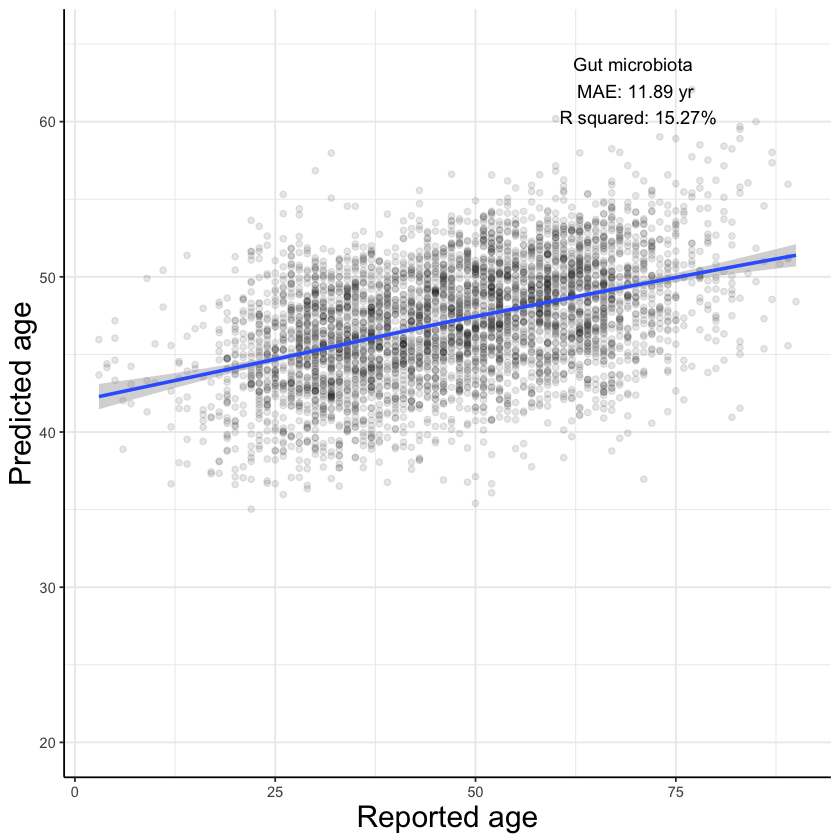

In [24]:
gut_p<-plot_obs_VS_pred(rf_all_gut$y, rf_all_gut$predicted, target_field="age", span=1, outdir = outpath)
gut_p <-gut_p + ylim(20, 65)+ 
        annotate("text", x=70, y=62, label= "Gut microbiota \n MAE: 11.89 yr \n R squared: 15.27%") 
gut_p

Warning message:
“Removed 25 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

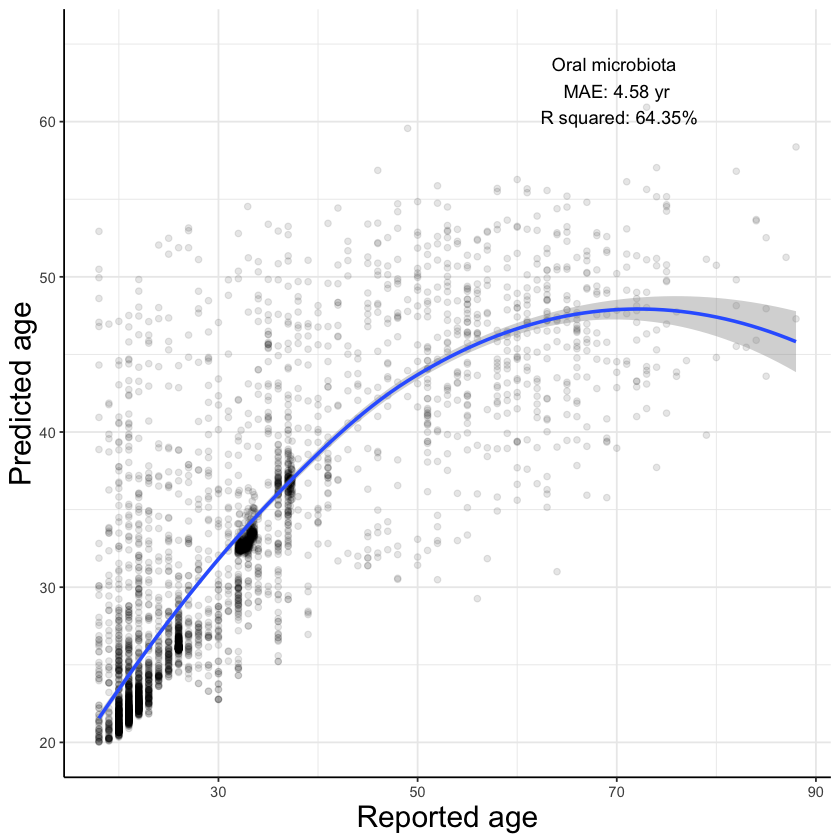

In [25]:
oral_p <-plot_obs_VS_pred(rf_all_oral$y[-c(179, 367)], rf_all_oral$predicted[-c(179, 367)], target_field="age", span=1, outdir = outpath)
oral_p <-oral_p + ylim(20, 65)+ 
         annotate("text", x=70, y=62, label= "Oral microbiota \n MAE: 4.58 yr \n R squared: 64.35%") 
oral_p

Warning message:
“Removed 86 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 86 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_smooth).”

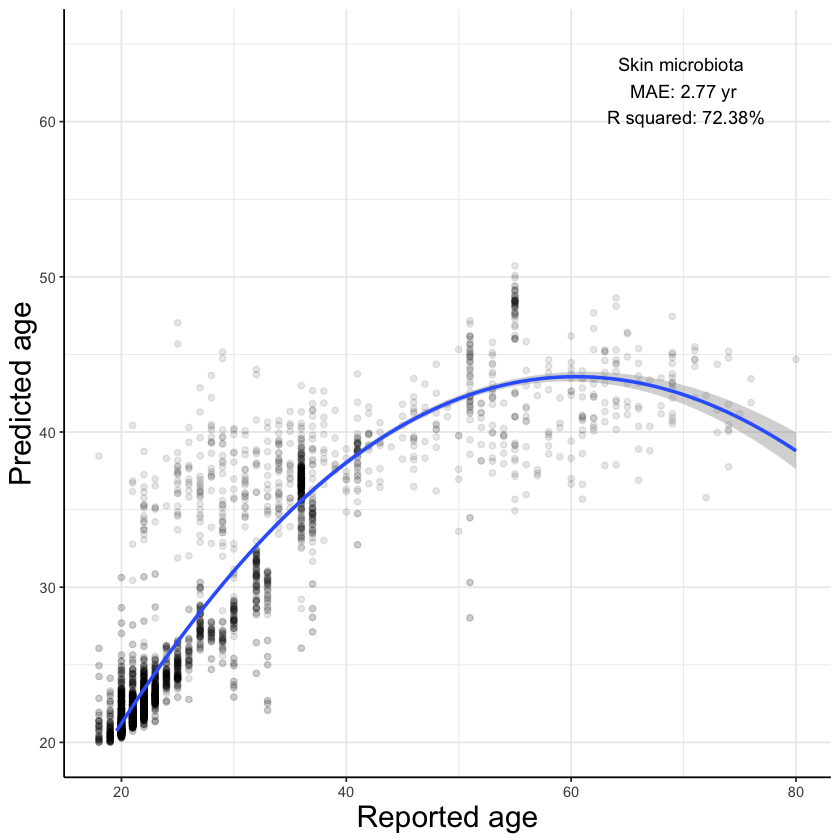

In [26]:
skin_p<-plot_obs_VS_pred(rf_all_skin$y[-c(179, 367)], rf_all_skin$predicted[-c(179, 367)], target_field="age", span=1, outdir = outpath)
skin_p<-skin_p + ylim(20, 65)+ 
        annotate("text", x=70, y=62, label= "Skin microbiota \n MAE: 2.77 yr \n R squared: 72.38%") 
skin_p

Warning message:
“Removed 25 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 25 rows containing missing values (geom_point).”Warning message:
“Removed 86 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 86 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_smooth).”

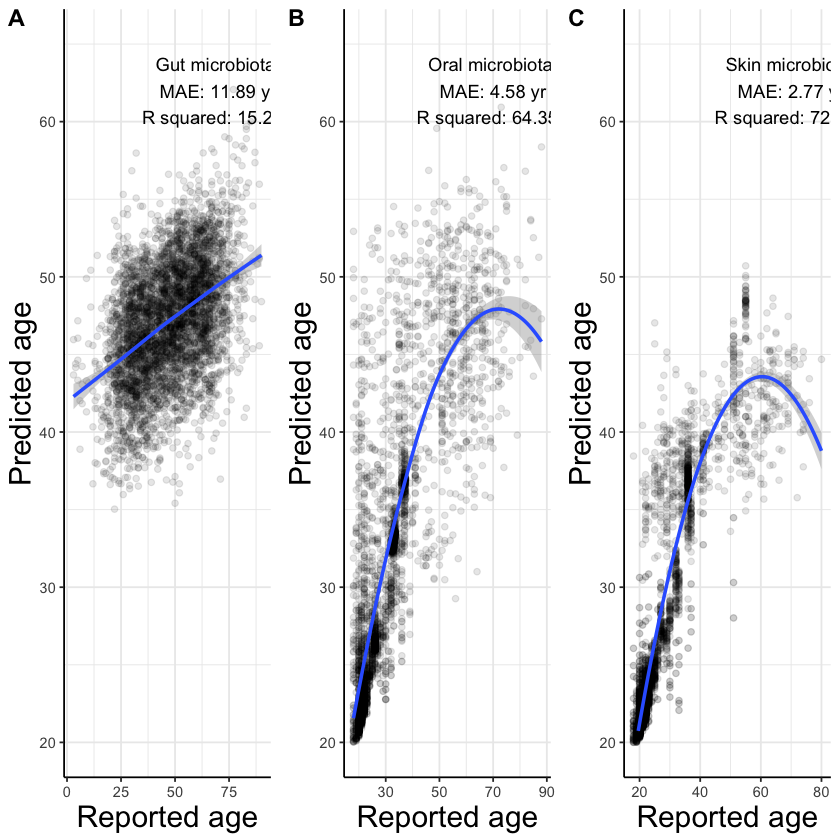

In [27]:
f1<-plot_grid(gut_p, oral_p, skin_p, rel_widths = c(1, 1, 1), ncol=3, labels="AUTO")
f1
ggsave(filename=paste(outpath, "Figure_1ABC.pdf",sep=""), plot=f1, height=4, width=12)

In [65]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.5

Matrix products: default
BLAS/LAPACK: /Users/huangshi/anaconda3/envs/r-env-ggplot2/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pROC_1.14.0         cowplot_0.9.4       doMC_1.3.6         
 [4] iterators_1.0.10    foreach_1.4.4       vegan_2.5-5        
 [7] lattice_0.20-35     permute_0.9-5       gridExtra_2.3      
[10] randomForest_4.6-14 plyr_1.8.4          combinat_0.0-8     
[13] pheatmap_1.0.12     ggplot2_3.1.1       reshape2_1.4.3     

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3       tidyselect_0.2.4   repr_0.15.0        purrr_0.2.5       
 [5] colorspace_1.3-2   htmltools_0.3.6    mgcv_1.8-24        base64enc_0.1-3   
 [9] rlang_0.2.1        pillar_1.3.0      